<a href="https://colab.research.google.com/github/mchirico/montco911/blob/master/Dev_911_Calls_Montco_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**911 Calls in Montgomery County PA**

Note:  You need to make a copy of this note book, if you want to run it yourself
by clicking on "File/Save a copy in Drive"



Sharable link:
https://drive.google.com/file/d/1_aZIvr3QWWSbU_DNWEz-E4yDLVR6Emgd/view?usp=sharing








[Google Maps of Accidents](https://storage.googleapis.com/montco-stats/vehicleAccident.html)



In [0]:
import requests
import pandas as pd
import numpy as np 
from datetime import datetime



import warnings
warnings.filterwarnings("ignore")

try:
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import keras
  import pydot
  import libarchive
  import torch
except:
  print("Will try to install software")
  # Lines below .... Only need to be run once at the top of the notebook.
  !pip install -q matplotlib-venn
  !pip install -q keras
  # #   https://pypi.python.org/pypi/pydot
  !apt-get -qq install -y graphviz && pip install -q pydot
  !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
  !pip install -U -q PyDrive
  !pip install --upgrade -q gspread
  
  !pip install torchvision
  
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import keras
  import pydot
  import libarchive





In [34]:
def readTZ():
    url="https://storage.googleapis.com/montco-stats/tzsmall.csv"
    d=requests.get(url,verify=True).content
    d=pd.read_csv(url,
                  header=0,names=['lat', 'lng','desc','zip','title','timeStamp','twp','e'],
            dtype={'lat':str,'lng':str,'desc':str,'zip':str,
                  'title':str,'timeStamp':str,'twp':str,'e':int})
    d=pd.DataFrame(d)
    d['timeStamp'] = d['timeStamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    return d

d=readTZ()
d.sort_values(by=['timeStamp'], ascending=False, inplace=True)
d.head()





,lat,lng,desc,zip,title,timeStamp,twp,e
19998,40.1563852,-75.1124763,YORK RD & LAKEVUE DR; UPPER MORELAND; Station...,19090,EMS: HEAD INJURY,2020-03-21 13:48:00,UPPER MORELAND,1
19997,40.1452712,-75.0271873,COUNTY LINE RD & LONGFELLOW RD; LOWER MORELAN...,19006,EMS: ALTERED MENTAL STATUS,2020-03-21 13:48:00,LOWER MORELAND,1
19996,40.0468825,-75.3076751,SPRINGMONT CIR & JOHN BARRY DR; LOWER MERION; ...,19010,Fire: FIRE ALARM,2020-03-21 13:47:01,LOWER MERION,1
19995,40.0636051,-75.1304061,SPRING AVE & STRATFORD AVE; CHELTENHAM; Stati...,19027,EMS: DIABETIC EMERGENCY,2020-03-21 13:47:01,CHELTENHAM,1
19994,40.0946819,-75.3629241,HUNTINGDONS RD; UPPER MERION; Station 356A; 2...,NaN,EMS: FRACTURE,2020-03-21 13:37:01,UPPER MERION,1


In [35]:
# Use a temp table (t)


t=d[d['timeStamp']>= '2015-01-01']

# Use for easy totals
t['e']=1
p = pd.pivot_table(t, values='e', index=['timeStamp'], columns=['title'], aggfunc=np.sum)


# 1 hour intervals
pp = p.resample('1h').apply(np.sum).reset_index()


pp.columns = pp.columns.get_level_values(0)

pp.fillna(0, inplace=True)
pp.sort_values(by=['timeStamp'], ascending=False, inplace=True)
pp[['timeStamp','Traffic: VEHICLE ACCIDENT -','Traffic: DISABLED VEHICLE -','Traffic: HAZARDOUS ROAD CONDITIONS -','EMS: VEHICLE ACCIDENT']].head(9)


title,timeStamp,Traffic: VEHICLE ACCIDENT -,Traffic: DISABLED VEHICLE -,Traffic: HAZARDOUS ROAD CONDITIONS -,EMS: VEHICLE ACCIDENT
1277,2020-03-21 13:00:00,1.0,0.0,1.0,0.0
1276,2020-03-21 12:00:00,0.0,1.0,2.0,0.0
1275,2020-03-21 11:00:00,2.0,0.0,0.0,0.0
1274,2020-03-21 10:00:00,2.0,0.0,0.0,0.0
1273,2020-03-21 09:00:00,0.0,0.0,0.0,0.0
1272,2020-03-21 08:00:00,2.0,0.0,0.0,1.0
1271,2020-03-21 07:00:00,1.0,3.0,0.0,1.0
1270,2020-03-21 06:00:00,1.0,0.0,0.0,0.0
1269,2020-03-21 05:00:00,0.0,0.0,0.0,0.0


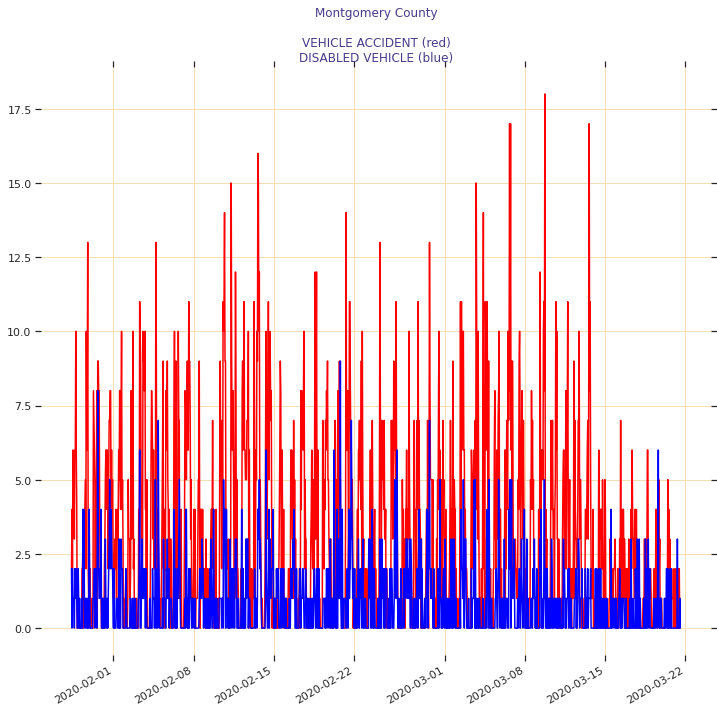

In [36]:


t=pp[pp['timeStamp']>= '2015-03-02']
#t=pp[pp['timeStamp']>= '2020-01-02']


from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(12,12))



ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


ax.plot(t['timeStamp'],t['Traffic: VEHICLE ACCIDENT -'],color = 'red')
ax.plot(t['timeStamp'],t['Traffic: DISABLED VEHICLE -'],color = 'blue')

ax.set_title("Montgomery County\n\nVEHICLE ACCIDENT (red)\nDISABLED VEHICLE (blue)", 
             fontsize=12, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

## EMS Calls

In [37]:
#d.head()
#d[d['title'].str.contains('RESPIRATORY', na=False)]

# Use a temp table (t)


t=d[d['timeStamp']>= '2015-01-01']

# Use for easy totals
t['e']=1
p = pd.pivot_table(t, values='e', index=['timeStamp'], columns=['title'], aggfunc=np.sum)


# h 1 hour intervals
# d 1 day 
pp = p.resample('3d').apply(np.sum).reset_index()


pp.columns = pp.columns.get_level_values(0)

pp.fillna(0, inplace=True)
pp.sort_values(by=['timeStamp'], ascending=False, inplace=True)
pp[['timeStamp','EMS: FEVER']].head(9)


title,timeStamp,EMS: FEVER
17,2020-03-19,14.0
16,2020-03-16,17.0
15,2020-03-13,15.0
14,2020-03-10,20.0
13,2020-03-07,14.0
12,2020-03-04,10.0
11,2020-03-01,8.0
10,2020-02-27,6.0
9,2020-02-24,8.0


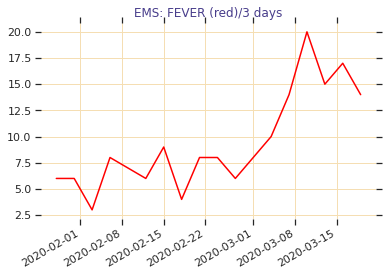

In [38]:
t=pp[pp['timeStamp']>= '2017-01-02']


from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


#ax.plot(t['timeStamp'],t['Traffic: VEHICLE ACCIDENT -'],color = 'red')
ax.plot(t['timeStamp'],t['EMS: FEVER'],color = 'red')

ax.set_title("EMS: FEVER (red)/3 days", 
             fontsize=12, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

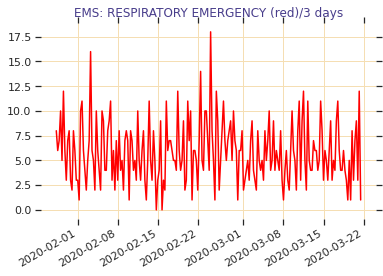

In [56]:
t=pp[pp['timeStamp']>= '2017-01-02']


from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


#ax.plot(t['timeStamp'],t['Traffic: VEHICLE ACCIDENT -'],color = 'red')
ax.plot(t['timeStamp'],t['EMS: RESPIRATORY EMERGENCY'],color = 'red')

ax.set_title("EMS: RESPIRATORY EMERGENCY (red)/3 days", 
             fontsize=12, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

In [39]:
pp[(pp['timeStamp']>= '2020-01-02')][['EMS: FEVER','timeStamp']]


title,EMS: FEVER,timeStamp
17,14.0,2020-03-19
16,17.0,2020-03-16
15,15.0,2020-03-13
14,20.0,2020-03-10
13,14.0,2020-03-07
12,10.0,2020-03-04
11,8.0,2020-03-01
10,6.0,2020-02-27
9,8.0,2020-02-24
8,8.0,2020-02-21


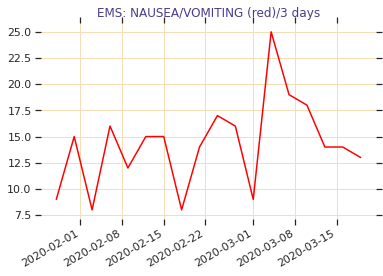

In [40]:
t=pp[pp['timeStamp']>= '2017-01-02']


from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


#ax.plot(t['timeStamp'],t['Traffic: VEHICLE ACCIDENT -'],color = 'red')
ax.plot(t['timeStamp'],t['EMS: NAUSEA/VOMITING'],color = 'red')

ax.set_title("EMS: NAUSEA/VOMITING (red)/3 days", 
             fontsize=12, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

# Playground... ideas


In [41]:
t=d[d['timeStamp']>= '2015-01-01']

# Use for easy totals
t['e']=1
p2 = pd.pivot_table(t, values='e', index=['timeStamp','twp'], columns=['title'], aggfunc=np.sum)




p2 = p2.reset_index()

pp2 = p2.groupby(['twp', pd.Grouper(key='timeStamp', freq='5d')])['EMS: FEVER','EMS: NAUSEA/VOMITING'].sum()
pp2=pp2.reset_index()
pp2.head()

title,twp,timeStamp,EMS: FEVER,EMS: NAUSEA/VOMITING
0,ABINGTON,2020-01-28,1.0,2.0
1,ABINGTON,2020-02-02,2.0,1.0
2,ABINGTON,2020-02-07,1.0,2.0
3,ABINGTON,2020-02-12,0.0,4.0
4,ABINGTON,2020-02-17,1.0,2.0


In [42]:

pp2[(pp2['timeStamp']>= '2020-03-10') & (pp2['EMS: FEVER'] > 1)]

title,twp,timeStamp,EMS: FEVER,EMS: NAUSEA/VOMITING
74,CHELTENHAM,2020-03-13,2.0,2.0
86,CHESTER COUNTY,2020-03-18,2.0,0.0
210,HORSHAM,2020-03-13,2.0,0.0
282,LOWER MERION,2020-03-18,3.0,0.0
303,LOWER POTTSGROVE,2020-03-13,2.0,0.0
380,NORRISTOWN,2020-03-13,3.0,2.0
381,NORRISTOWN,2020-03-18,2.0,4.0
525,SPRINGFIELD,2020-03-13,3.0,0.0
570,UPPER DUBLIN,2020-03-18,2.0,0.0
625,UPPER MORELAND,2020-03-18,2.0,0.0


In [43]:
z=pp2[(pp2['timeStamp']>= '2020-02-01') & (pp2['EMS: FEVER'] > 1)]
z.head()

title,twp,timeStamp,EMS: FEVER,EMS: NAUSEA/VOMITING
1,ABINGTON,2020-02-02,2.0,1.0
8,ABINGTON,2020-03-08,3.0,3.0
19,AMBLER,2020-03-08,3.0,0.0
70,CHELTENHAM,2020-02-22,2.0,1.0
74,CHELTENHAM,2020-03-13,2.0,2.0


In [44]:
z=pp2[(pp2['timeStamp']>= '2017-02-01') & (pp2['EMS: FEVER'] > 1)]

zz=pd.pivot_table(z, values='EMS: FEVER', index=['timeStamp'], columns=['twp'], aggfunc=np.sum)
tz=zz.sort_index(axis=0, level=None, ascending=False).fillna(0)
tz=tz.reset_index()

tz['Total']=tz.sum(numeric_only=True, axis=1)
tz




twp,timeStamp,ABINGTON,AMBLER,CHELTENHAM,CHESTER COUNTY,HORSHAM,LOWER MERION,LOWER MORELAND,LOWER POTTSGROVE,LOWER PROVIDENCE,NORRISTOWN,POTTSTOWN,SPRINGFIELD,UPPER DUBLIN,UPPER MORELAND,Total
0,2020-03-18,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,11.0
1,2020-03-13,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,0.0,12.0
2,2020-03-08,3.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0
3,2020-03-03,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0
4,2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0
5,2020-02-22,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0
6,2020-02-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0
7,2020-02-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
8,2020-02-07,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,8.0
9,2020-02-02,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [45]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [46]:
z

title,twp,timeStamp,EMS: FEVER,EMS: NAUSEA/VOMITING
1,ABINGTON,2020-02-02,2.0,1.0
8,ABINGTON,2020-03-08,3.0,3.0
19,AMBLER,2020-03-08,3.0,0.0
65,CHELTENHAM,2020-01-28,2.0,1.0
70,CHELTENHAM,2020-02-22,2.0,1.0
74,CHELTENHAM,2020-03-13,2.0,2.0
86,CHESTER COUNTY,2020-03-18,2.0,0.0
210,HORSHAM,2020-03-13,2.0,0.0
274,LOWER MERION,2020-02-07,4.0,1.0
279,LOWER MERION,2020-03-03,3.0,1.0


In [47]:
import plotly.express as px
df = px.data.gapminder()
# fig = px.area(df, x="year", y="pop", color="continent", line_group="country")
# fig = px.area(z, x="timeStamp", y="EMS: FEVER", color="twp", line_group="twp")
# fig = px.line(z, x="timeStamp", y="EMS: FEVER", color="twp", line_group="twp", hover_name="twp",
#        line_shape="spline", render_mode="svg")
# fig = px.line(z, x="timeStamp", y="EMS: FEVER", color='twp', hover_name="twp")

fig = px.histogram(z, x="timeStamp", y="EMS: FEVER", color="twp",hover_name="twp")

fig.show()

In [0]:
from google.colab import files
tz.to_excel('tz.xlsx')

files.download('tz.xlsx')

In [49]:

t['twp'].value_counts()

LOWER MERION       1500
NORRISTOWN         1218
UPPER MERION       1181
ABINGTON           1141
POTTSTOWN           917
                   ... 
SCHWENKSVILLE        32
EAST GREENVILLE      28
GREEN LANE           10
LEHIGH COUNTY         8
PHILA COUNTY          3
Name: twp, Length: 68, dtype: int64

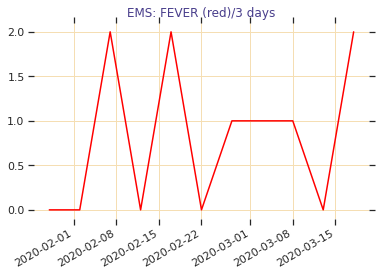

In [50]:
t=pp2[pp2['timeStamp']>= '2017-01-02']


from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


r=t[t['twp']=='UPPER MORELAND']
ax.plot(r['timeStamp'],r['EMS: FEVER'],color = 'red')

ax.set_title("EMS: FEVER (red)/3 days", 
             fontsize=12, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

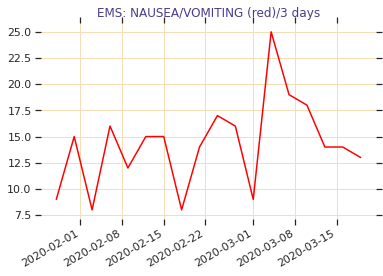

In [51]:
t=pp[pp['timeStamp']>= '2017-01-02']


from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


#ax.plot(t['timeStamp'],t['Traffic: VEHICLE ACCIDENT -'],color = 'red')
ax.plot(t['timeStamp'],t['EMS: NAUSEA/VOMITING'],color = 'red')

ax.set_title("EMS: NAUSEA/VOMITING (red)/3 days", 
             fontsize=12, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

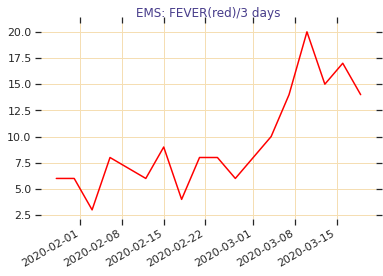

In [52]:
t=pp[pp['timeStamp']>= '2017-01-02']


from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


#ax.plot(t['timeStamp'],t['Traffic: VEHICLE ACCIDENT -'],color = 'red')
ax.plot(t['timeStamp'],t['EMS: FEVER'],color = 'red')

ax.set_title("EMS: FEVER(red)/3 days", 
             fontsize=12, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

In [53]:
# Use a temp table (t)


t=d[d['timeStamp']>= '2015-01-01']

# Use for easy totals
t['e']=1
p = pd.pivot_table(t, values='e', index=['timeStamp'], columns=['title'], aggfunc=np.sum)


# 1 hour intervals
pp = p.resample('1h').apply(np.sum).reset_index()


pp.columns = pp.columns.get_level_values(0)

pp.fillna(0, inplace=True)
pp.sort_values(by=['timeStamp'], ascending=False, inplace=True)
pp[['timeStamp','Traffic: VEHICLE ACCIDENT -','Traffic: DISABLED VEHICLE -','Traffic: HAZARDOUS ROAD CONDITIONS -','EMS: VEHICLE ACCIDENT']].head(9)


title,timeStamp,Traffic: VEHICLE ACCIDENT -,Traffic: DISABLED VEHICLE -,Traffic: HAZARDOUS ROAD CONDITIONS -,EMS: VEHICLE ACCIDENT
1277,2020-03-21 13:00:00,1.0,0.0,1.0,0.0
1276,2020-03-21 12:00:00,0.0,1.0,2.0,0.0
1275,2020-03-21 11:00:00,2.0,0.0,0.0,0.0
1274,2020-03-21 10:00:00,2.0,0.0,0.0,0.0
1273,2020-03-21 09:00:00,0.0,0.0,0.0,0.0
1272,2020-03-21 08:00:00,2.0,0.0,0.0,1.0
1271,2020-03-21 07:00:00,1.0,3.0,0.0,1.0
1270,2020-03-21 06:00:00,1.0,0.0,0.0,0.0
1269,2020-03-21 05:00:00,0.0,0.0,0.0,0.0



**CARDIAC ARREST**


In [54]:
# Use a temp table (t)


t=d[d['timeStamp']>= '2015-01-01']

# Use for easy totals
t['e']=1
p = pd.pivot_table(t, values='e', index=['timeStamp'], columns=['title'], aggfunc=np.sum)


# 1 hour intervals
pp = p.resample('6h').apply(np.sum).reset_index()


pp.columns = pp.columns.get_level_values(0)

pp.fillna(0, inplace=True)
pp.sort_values(by=['timeStamp'], ascending=False, inplace=True)
pp[['timeStamp','EMS: CARDIAC ARREST','EMS: FALL VICTIM','Traffic: VEHICLE ACCIDENT -','EMS: VEHICLE ACCIDENT']].head(10)


title,timeStamp,EMS: CARDIAC ARREST,EMS: FALL VICTIM,Traffic: VEHICLE ACCIDENT -,EMS: VEHICLE ACCIDENT
213,2020-03-21 12:00:00,0.0,1.0,1.0,0.0
212,2020-03-21 06:00:00,2.0,4.0,8.0,2.0
211,2020-03-21 00:00:00,1.0,1.0,5.0,1.0
210,2020-03-20 18:00:00,2.0,5.0,6.0,1.0
209,2020-03-20 12:00:00,2.0,6.0,12.0,1.0
208,2020-03-20 06:00:00,1.0,5.0,10.0,2.0
207,2020-03-20 00:00:00,0.0,2.0,0.0,0.0
206,2020-03-19 18:00:00,0.0,4.0,5.0,1.0
205,2020-03-19 12:00:00,1.0,2.0,15.0,0.0
204,2020-03-19 06:00:00,1.0,6.0,11.0,2.0


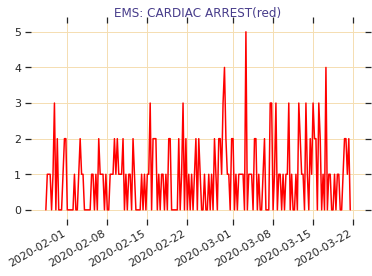

In [55]:
t=pp[pp['timeStamp']>= '2018-01-02']


from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


#ax.plot(t['timeStamp'],t['Traffic: VEHICLE ACCIDENT -'],color = 'red')
ax.plot(t['timeStamp'],t['EMS: CARDIAC ARREST'],color = 'red')

ax.set_title("EMS: CARDIAC ARREST(red)", 
             fontsize=12, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

In [0]:
# Ref: 'https://insights.arcgis.com/index.html#/embed/0b41be4066764191a8a99ad6f377a365'
